<a href="https://colab.research.google.com/github/hamzafarooq/DataStructures-Algo/blob/master/Kmeans_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
class Kmean:
    def __init__(self,df,k=4,no_iteration = 100):
        self.df = df.values
        self.k = k
        self.no_iteration = no_iteration
    
    def fit(self,data):
        randomindex = np.random.choice(len(self.data),self.k,replace=False)
        center_location = self.data[randomindex:randomindex+1] ### random index
        loss = 0
        for i in range(len(self.k)):
            temp_loss = (np.sum((self.df-self.k[i])**2)**1/2)
            loss = loss + temp_loss
         #sqrt(sum(squared difference between each point))#euclidean distance # setting the baseline
        
        for j in range(self.no_iteration):
            tempindex = np.random.choice(len(self.data),self.k,replace=False)
            center_location = self.data[tempindex:tempindex+1]
            loss_temp = 0 # loss function
            for i in range(len(self.k)):
                temp_loss = (np.sum((self.df-self.k[i])**2)**1/2)
                loss_temp +=  temp_loss
            if loss_temp < loss:
                loss = loss_temp
                
        return loss
        
        
    

#usage
model_knn = Kmean(4,100)
model_knn.fit(df)



# we have a set of data points
# we identify centroids
# no of iterations to be set
# loss function - eucledian distance



In [9]:
import random
class K_Means:
	def __init__(self, k =3, tolerance = 0.0001, max_iterations = 500):
		self.k = k
		self.tolerance = tolerance
		self.max_iterations = max_iterations

	def fit(self, data):

		self.centroids = {}

		#initialize the centroids, the first 'k' elements in the dataset will be our initial centroids
		for i in range(self.k):
			self.centroids[i] = data[i]
	

		#begin iterations
		for i in range(self.max_iterations):
			self.classes = {}
			for i in range(self.k):
				self.classes[i] = []

			#find the distance between the point and cluster; choose the nearest centroid
			for features in data:
				distances = [np.linalg.norm(features - self.centroids[centroid]) for centroid in self.centroids]
				classification = distances.index(min(distances))
				self.classes[classification].append(features)

			previous = dict(self.centroids)

			#average the cluster datapoints to re-calculate the centroids
			for classification in self.classes:
				self.centroids[classification] = np.average(self.classes[classification], axis = 0)

			isOptimal = True

			for centroid in self.centroids:

				original_centroid = previous[centroid]
				curr = self.centroids[centroid]

				if np.sum((curr - original_centroid)/original_centroid * 100.0) > self.tolerance:
					isOptimal = False

			#break out of the main loop if the results are optimal, ie. the centroids don't change their positions much(more than our tolerance)
			if isOptimal:
				break

	def pred(self, data):
		distances = [np.linalg.norm(data - self.centroids[centroid]) for centroid in self.centroids]
		classification = distances.index(min(distances))
		return classification


In [10]:
clf = K_Means()

In [16]:
import random
class Kmeansfromscratch:
  def __init__(self,df,k=3,max_iter=300):
    self.k=k
    self.max_iter=max_iter
    self.df = df

  def fit(self):

    idx = np.random.choice(len(self.df),self.k,replace=False)
    self.centroids = self.df[idx,:]
    P = np.argmin(distance.cdist(self.df, self.centroids, 'euclidean'),axis=1)
    for _ in range(self.max_iter):
      self.centroids = np.vstack([self.df[P==i,:].mean(axis=0) for i in range(self.k)])
      tmp = np.argmin(distance.cdist(self.df, self.centroids, 'euclidean'),axis=1)
      if np.array_equal(P,tmp):break
      P = tmp
    return P

In [25]:

import numpy as np
import pandas as pd
from scipy.spatial import distance
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline
X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8 ],
              [8, 8],
              [1, 0.6],
              [9,11]])
clf=Kmeansfromscratch(X,2,200)

In [26]:
P=clf.fit()

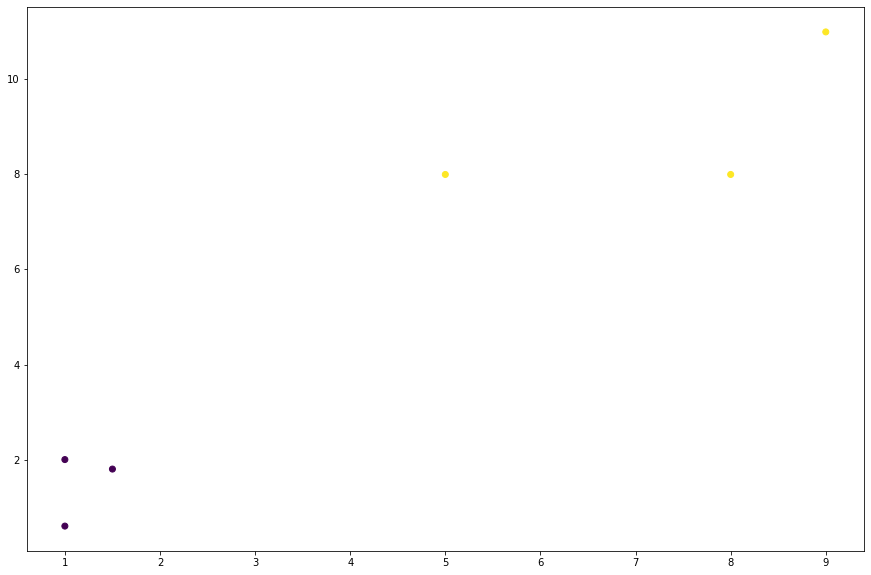

In [27]:
plt.figure(figsize=(15,10))
plt.scatter(X[:,0],X[:,1],c=P)
plt.show()